In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

76.98671671399254 23.215063850655582
45.421577173317615 -156.52067035116252
13.963708352982735 -56.58642474663898
88.30794478944725 85.19287926731636
-72.54878635097833 159.92105266656347
59.684792907822754 -46.47578664820142
-42.86577864129121 17.558587686751252
37.1570006077161 63.796160928741955
73.03558059885398 -179.616655675613
-74.24963321793258 9.08741318360208
89.37693575361527 -32.19164081456526
-60.123445153023034 -89.29284351047158
73.78435119447886 115.99474056842627
-34.63098093737184 125.66775383038282
88.21602541795897 -16.715844714941
77.53001187932739 -68.8120208683558
51.56549338130202 105.23132061148601
36.62891075987089 -139.5786209294291
-38.66376326622759 -12.441118674993959
-37.5286760381879 -150.21966055350455
19.71997742236327 45.747153578538786
-52.71031159338826 31.041730588620112
88.76530483199878 -28.464020486599708
-1.6856754923363155 -164.68030518309095
4.169177058459184 119.82251762363808
-44.67322758400586 -134.42941957412995
14.074777274226264 103.100

14.077357575728442 66.06058427373895
27.055961012379754 123.8341262785703
-25.984618657900796 -132.54890752084526
6.61113589930585 47.12064814196751
62.8584207717461 113.84347529921723
-11.28689063612137 -118.80105018679627
14.34262684182795 -6.159008594218761
-72.31839889706585 -13.13258448016336
86.11287382359396 17.491094514901732
78.20617599158098 124.32596658831977
-74.21272527980464 66.39128400946646
-21.321632829928944 133.83040133282378
-17.733456349703275 135.09132227615538
-26.444681378159274 -121.69372806542019
83.5921922880537 130.93351537055435
-32.27599994157847 44.41844620247127
-80.42709049366728 -101.67703168016442
-29.254602072582692 -4.767396672023722
-43.593764164721456 -38.28924551992495
-57.67693199921098 59.395764512351434
-58.73789485537213 62.956325554064506
-19.533002799583713 68.76904967428848
-68.89972932124152 -143.0613782159097
14.237645439230988 -133.00849887429018
14.560326970360336 166.52753444980948
62.278196741975194 -94.79000405668572
9.5735509328568

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ca716ab48d8d7400907d4af31e1ab7b


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ca716ab48d8d7400907d4af31e1ab7b&q=Boston


In [10]:
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
city_weather.status_code

200

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


### convert URL to JSON, to parse

In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 54.1,
  'feels_like': 52.32,
  'temp_min': 48.99,
  'temp_max': 59,
  'pressure': 1017,
  'humidity': 66},
 'visibility': 10000,
 'wind': {'speed': 12.66, 'deg': 90},
 'clouds': {'all': 20},
 'dt': 1618428660,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1618394657,
  'sunset': 1618442649},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

### rename json variable to parse/ "get" keys and values

In [16]:
# Get the JSON data.
boston_data = city_weather.json()

In [17]:
boston_data['sys']

{'type': 1,
 'id': 3486,
 'country': 'US',
 'sunrise': 1618394657,
 'sunset': 1618442649}

In [18]:
boston_data["sys"] ["country"]

'US'

In [19]:
boston_data["dt"]

1618428660

In [20]:
boston_data["coord"]["lat"]

42.3584

In [21]:
boston_data["main"]["temp_max"]

59

### retrieve data for lat, lang, max temp, humidity, clouds, and wind

In [22]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 59 66 20 12.66


### Datetime Module

In [24]:
# Import the datetime module from the datetime library.
from datetime import datetime

## Get the weather data for each city

In [25]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | havoysund
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | bathsheba
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | qaqortoq
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | dawlatabad
Processing Record 9 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | saskylakh
Processing Record 13 of Set 1 | esperance
Processing Record 14 of Set 1 | narsaq
Processing Record 15 of Set 1 | tankhoy
Processing Record 16 of Set 1 | fortuna
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | najran
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | samusu
City not found. Skippin

Processing Record 40 of Set 4 | chokurdakh
Processing Record 41 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 42 of Set 4 | torit
Processing Record 43 of Set 4 | vitim
Processing Record 44 of Set 4 | nadym
Processing Record 45 of Set 4 | bilibino
Processing Record 46 of Set 4 | makat
Processing Record 47 of Set 4 | tekax
City not found. Skipping...
Processing Record 48 of Set 4 | kaeo
Processing Record 49 of Set 4 | padang
Processing Record 50 of Set 4 | riyadh
Processing Record 1 of Set 5 | monteagudo
Processing Record 2 of Set 5 | krasnoselkup
Processing Record 3 of Set 5 | zyryanka
Processing Record 4 of Set 5 | calvinia
Processing Record 5 of Set 5 | tual
Processing Record 6 of Set 5 | ketchikan
Processing Record 7 of Set 5 | pevek
Processing Record 8 of Set 5 | plouzane
Processing Record 9 of Set 5 | hare bay
Processing Record 10 of Set 5 | agaro
Processing Record 11 of Set 5 | bonavista
Processing Record 12 of Set 5 | sao joao da barra
Processing

Processing Record 29 of Set 8 | ugoofaaru
Processing Record 30 of Set 8 | upata
Processing Record 31 of Set 8 | saleaula
City not found. Skipping...
Processing Record 32 of Set 8 | geraldton
Processing Record 33 of Set 8 | coquimbo
Processing Record 34 of Set 8 | tikapur
Processing Record 35 of Set 8 | kaitangata
Processing Record 36 of Set 8 | dutlwe
Processing Record 37 of Set 8 | aliwal north
Processing Record 38 of Set 8 | sangar
Processing Record 39 of Set 8 | gap
Processing Record 40 of Set 8 | kashi
Processing Record 41 of Set 8 | iralaya
Processing Record 42 of Set 8 | villa carlos paz
Processing Record 43 of Set 8 | mount gambier
Processing Record 44 of Set 8 | alofi
Processing Record 45 of Set 8 | isangel
Processing Record 46 of Set 8 | gamba
Processing Record 47 of Set 8 | whyalla
Processing Record 48 of Set 8 | ambodifototra
City not found. Skipping...
Processing Record 49 of Set 8 | paamiut
Processing Record 50 of Set 8 | sinnamary
Processing Record 1 of Set 9 | port-genti

Processing Record 17 of Set 12 | leshukonskoye
Processing Record 18 of Set 12 | lithgow
Processing Record 19 of Set 12 | sosnovo-ozerskoye
Processing Record 20 of Set 12 | zamora
Processing Record 21 of Set 12 | mackenzie
Processing Record 22 of Set 12 | labytnangi
Processing Record 23 of Set 12 | nangal
Processing Record 24 of Set 12 | sheregesh
Processing Record 25 of Set 12 | zhaozhou
Processing Record 26 of Set 12 | aldan
Processing Record 27 of Set 12 | sibu
Processing Record 28 of Set 12 | maues
Processing Record 29 of Set 12 | xiongshi
City not found. Skipping...
Processing Record 30 of Set 12 | brainerd
Processing Record 31 of Set 12 | paka
Processing Record 32 of Set 12 | san pablo de las salinas
Processing Record 33 of Set 12 | grand gaube
Processing Record 34 of Set 12 | mahenge
Processing Record 35 of Set 12 | hondagua
Processing Record 36 of Set 12 | jumla
Processing Record 37 of Set 12 | male
Processing Record 38 of Set 12 | sedalia
Processing Record 39 of Set 12 | belyy 

In [26]:
len(city_data)

581

In [27]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Havoysund,70.9963,24.6622,30.20,64,75,3.44,NO,2021-04-14 23:26:57
1,Kodiak,57.7900,-152.4072,44.60,65,90,9.22,US,2021-04-14 23:26:57
2,Bathsheba,13.2167,-59.5167,78.80,69,40,8.05,BB,2021-04-14 23:26:58
3,Dikson,73.5069,80.5464,-21.55,100,100,5.35,RU,2021-04-14 23:26:58
4,Bluff,-46.6000,168.3333,60.01,80,60,4.00,NZ,2021-04-14 23:26:58
5,Qaqortoq,60.7167,-46.0333,33.80,75,20,4.61,GL,2021-04-14 23:26:58
6,Hermanus,-34.4187,19.2345,64.00,88,18,1.01,ZA,2021-04-14 23:26:59
7,Dawlatabad,36.4141,64.9053,61.70,33,99,4.72,AF,2021-04-14 23:26:59
8,Punta Arenas,-53.1500,-70.9167,37.40,87,0,17.27,CL,2021-04-14 23:26:59
9,Saskylakh,71.9167,114.0833,-6.05,99,71,3.74,RU,2021-04-14 23:26:59


In [30]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Havoysund,NO,2021-04-14 23:26:57,70.9963,24.6622,30.20,64,75,3.44
1,Kodiak,US,2021-04-14 23:26:57,57.7900,-152.4072,44.60,65,90,9.22
2,Bathsheba,BB,2021-04-14 23:26:58,13.2167,-59.5167,78.80,69,40,8.05
3,Dikson,RU,2021-04-14 23:26:58,73.5069,80.5464,-21.55,100,100,5.35
4,Bluff,NZ,2021-04-14 23:26:58,-46.6000,168.3333,60.01,80,60,4.00
...,...,...,...,...,...,...,...,...,...
576,Kasempa,ZM,2021-04-14 23:30:16,-13.4584,25.8338,58.33,92,36,4.47
577,Aripuana,BR,2021-04-14 23:30:16,-9.1667,-60.6333,74.07,96,99,2.93
578,Henties Bay,NA,2021-04-14 23:30:16,-22.1160,14.2845,79.00,29,0,5.01
579,Huacho,PE,2021-04-14 23:30:16,-11.1067,-77.6050,67.42,84,88,6.44


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

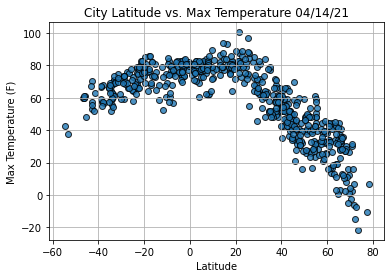

In [34]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

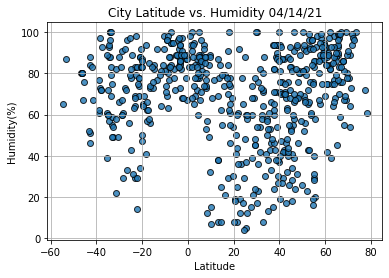

In [38]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

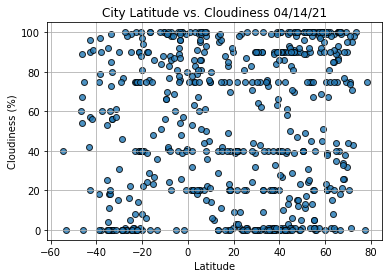

In [39]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

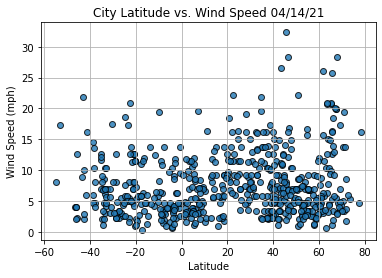

In [40]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()